In [2]:
import functions.uap as uap
import pickle as pk

from sklearn.linear_model import LogisticRegression, LinearRegression

In [3]:
df = uap.get_data()

In [ ]:
X_train, X_test, y_train, y_test = uap.get_baseline_data(df, 'target')
reg_base_model = LinearRegression()
reg_base_model.fit(X_train, y_train)
uap.check_regression(reg_base_model, X_train, X_test, y_train, y_test)

target
25.0     924
21.0     877
17.0     824
30.0     780
34.0     670
        ... 
320.0      1
13.8       1
14.8       1
410.0      1
228.0      1
Name: count, Length: 358, dtype: int64



|Score|Test|Train|
|:--|--:|--:|
|MAE|19.557|19.054|
|MSE|849.519|787.234|
|R² Score|0.614|0.641|


In [ ]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels = uap.get_baseline_data(df, 'target_aqi', factorize_target=True)

cat_base_model_aqi = LogisticRegression()
cat_base_model_aqi.fit(X_train_cat, y_train_cat)
fig = uap.check_classification(cat_base_model_aqi, X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels, train=False)
fig.show()
fig.savefig('images/model_baseline_aqi.png')

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

/home/boesi/lessons/2025-05-06-ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1136123/3553450198.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


--- Test data ---
              precision    recall  f1-score   support

     Healthy       0.93      0.96      0.94      5173
   Unhealthy       0.72      0.63      0.67       939

    accuracy                           0.91      6112
   macro avg       0.83      0.79      0.81      6112
weighted avg       0.90      0.91      0.90      6112



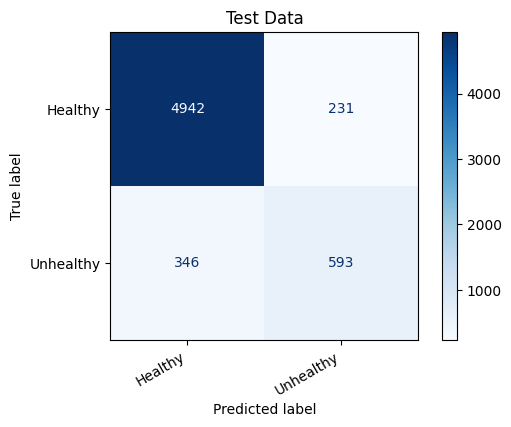

In [5]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels = uap.get_baseline_data(df, 'target_health', factorize_target=True)
cat_base_model_healthy = LogisticRegression()
cat_base_model_healthy.fit(X_train_cat, y_train_cat)
fig = uap.check_classification(cat_base_model_healthy, X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels, train=False)
fig.show()
fig.savefig('images/model_baseline_health.png')

In [6]:
with open('models/base_linreg_model.pkl', 'wb') as f:
    pk.dump(reg_base_model, f)
with open('models/base_logreg_model_aqi.pkl', 'wb') as f:
    pk.dump(cat_base_model_aqi, f)
with open('models/base_logreg_model_healthy.pkl', 'wb') as f:
    pk.dump(cat_base_model_healthy, f)
